In [29]:
from mutagene.profiles import Sample
import json
import numpy as np
from glob import glob
from subprocess import Popen, PIPE

In [40]:
def deconstruct_sigs(profile_fname, sample='1'):
    script1 = """
library(jsonlite)
library(deconstructSigs)
s <- t(read.table('{}', sep="\t", header=FALSE, row.names=NULL))
row.names(s) <- '{}'
s <- as.data.frame(s)
w <- whichSignatures(s / sum(s), signatures.ref=signatures.cosmic, signature.cutoff=0.00)
toJSON(w)
"""
    script2 = script1.format(profile_fname, sample).encode("utf-8")

    proc = Popen(["Rscript", "-"], stdin=PIPE, stdout=PIPE, stderr=PIPE)
    out, err = proc.communicate(script2, timeout=10)
    exitcode = proc.returncode
    if exitcode:
        print("Exit code:", exitcode, "Out:", out.decode("utf-8"), "Error:", err.decode("utf-8"), sep="\n\n")
        raise Exception("R error")
    json_string = out.decode("utf-8")
    w = json.loads(json_string)
    # import pprint
    # pprint.pprint(w)
    result = []
    for k, v in w['weights'][0].items():
        if k.startswith('_row'):
            continue
        # if float(v) == 0.0:
        #     continue
        name = k.replace('Signature.', '')
        result.append({
            'name': name,
            'score': v})
    return result

In [3]:
# Find sample files
sample_files = glob('samples/*/data_mutations_mskcc.txt')
list(enumerate(sample_files))

[(0, 'samples/brca_bccrc/data_mutations_mskcc.txt'),
 (1, 'samples/brca_broad/data_mutations_mskcc.txt'),
 (2, 'samples/brca_metabric/data_mutations_mskcc.txt'),
 (3, 'samples/brca_mskcc_2019/data_mutations_mskcc.txt'),
 (4, 'samples/brca_sanger/data_mutations_mskcc.txt'),
 (5, 'samples/breast_msk_2018/data_mutations_mskcc.txt'),
 (6, 'samples/luad_broad/data_mutations_mskcc.txt'),
 (7, 'samples/luad_mskcc_2015/data_mutations_mskcc.txt'),
 (8, 'samples/luad_tcga/data_mutations_mskcc.txt'),
 (9, 'samples/luad_tcga_pan_can_atlas_2018/data_mutations_mskcc.txt'),
 (10, 'samples/luad_tcga_pub/data_mutations_mskcc.txt'),
 (11, 'samples/luad_tsp/data_mutations_mskcc.txt'),
 (12, 'samples/skcm_broad/data_mutations_mskcc.txt'),
 (13, 'samples/skcm_broad_brafresist_2012/data_mutations_mskcc.txt'),
 (14, 'samples/skcm_yale/data_mutations_mskcc.txt')]

In [4]:
# Get samples from multisample file
samples = Sample.multisample(sample_files[12], 'samples/hg19.2bit')

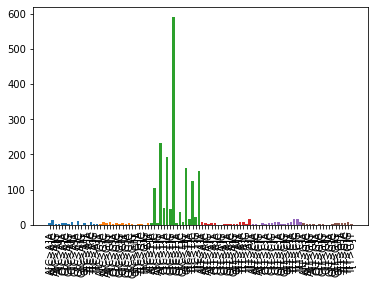

In [5]:
np.savetxt('samp.test', samples[-1].profile, delimiter='\t')
samples[-1].plot_profile()

In [41]:
deconstruct_sigs('samp.test')

Exit code:

1

Out:



Error:

Error in whichSignatures(s/sum(s), signatures.ref = signatures.cosmic,  : 
  Check column names on input file
Execution halted



Exception: R error